# Violin Plot
It is the mixture of two kde (one regular kde and other inverted kde) plots and a boxplot. It is used for visulization of the numerical data.

### Importing libraries

In [1]:
#importing libraries
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#setting style
sns.set_style('darkgrid')
#checking the version
sns.__version__

'0.11.1'

### Reading data

In [2]:
#loading the data and dropping the null values
cars=sns.load_dataset('mpg').dropna()
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
cars.shape

(392, 9)

In [4]:
cars.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

Filter down to only cars with even number of cylinders.

In [5]:
cars=cars[cars.cylinders.isin([4,6,8])]
cars.cylinders.value_counts()

4    199
8    103
6     83
Name: cylinders, dtype: int64

### Creating a violin plot

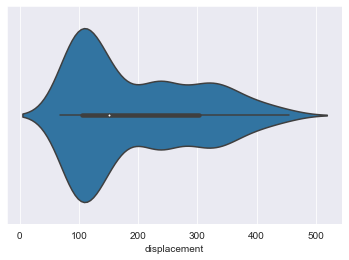

In [6]:
#for a single variable
sns.violinplot(data=cars, x='displacement');

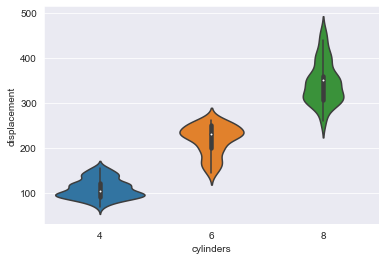

In [7]:
#plotting with categorical variable
sns.violinplot(data=cars, x='cylinders', y='displacement');

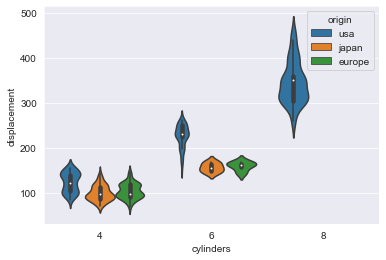

In [8]:
#passing another category as hue
sns.violinplot(data=cars, x='cylinders', y='displacement',hue='origin');

### Violin plot options

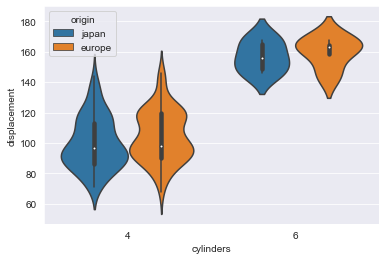

In [9]:
sns.violinplot(data=cars[cars.origin.isin(['japan','europe'])], x='cylinders', y='displacement', hue='origin' );

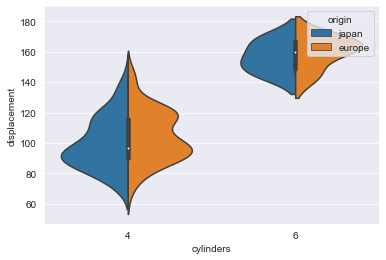

In [10]:
# Split : Putting two catgories on same violin 
sns.violinplot(data=cars[cars.origin.isin(['japan','europe'])], 
               x='cylinders', y='displacement', hue='origin',
              split=True);
# for splitting the violin we should only have two categories given in hue

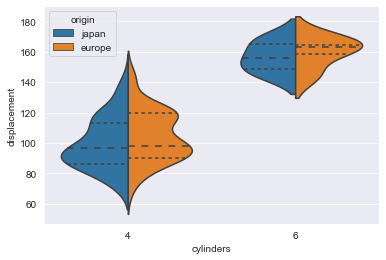

In [11]:
# Inner : changing the form of quartiles so that they are easily visible
sns.violinplot(data=cars[cars.origin.isin(['japan','europe'])], 
               x='cylinders', y='displacement', hue='origin',
              split=True, inner='quartiles');

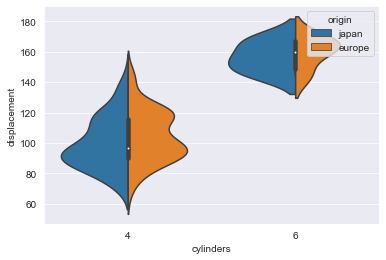

In [12]:
# Scale : allows to find number of observation for each portion of the data
sns.violinplot(data=cars[cars.origin.isin(['japan','europe'])], 
               x='cylinders', y='displacement', hue='origin',
              split=True, scale='count');
#But this is quiet misleading since we the violin plot is splitting the data then plots it 
#(here it splits on the basis on number of cylinders)

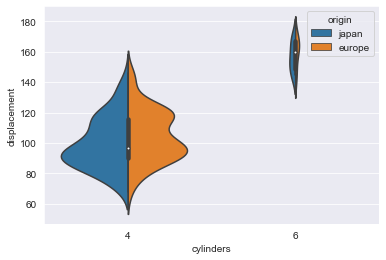

In [13]:
#we will turn off the hue factor with scale
sns.violinplot(data=cars[cars.origin.isin(['japan','europe'])], 
               x='cylinders', y='displacement', hue='origin',
              split=True, scale='count',scale_hue=False);
#now the difference is clearly visible

In [14]:
# Number for cars with each number of cylinders
(cars[cars.origin.isin(['japan','europe'])].groupby('cylinders').origin.value_counts())

cylinders  origin
4          japan     69
           europe    61
6          japan      6
           europe     4
Name: origin, dtype: int64

### Styling

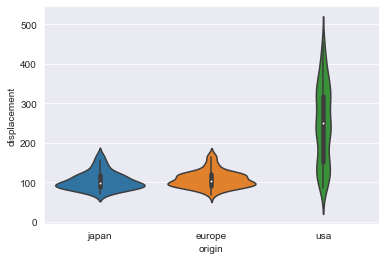

In [15]:
#changing the order
sns.violinplot(data=cars, x='origin', y='displacement',order=['japan','europe','usa']);

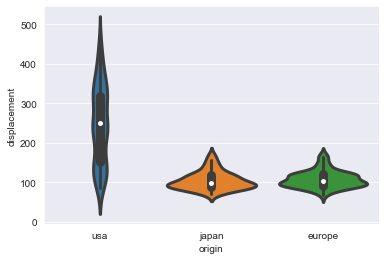

In [16]:
#changing the linewidth
sns.violinplot(data=cars, x='origin', y='displacement', linewidth=3);

### KDE Options

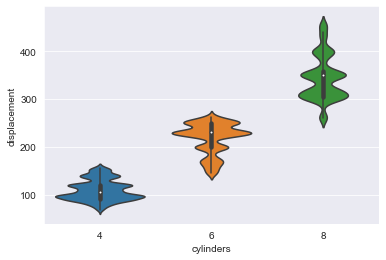

In [17]:
#changing bandwidth
sns.violinplot(data=cars, x='cylinders', y='displacement',bw=0.2);

The End